[*********************100%***********************]  1 of 1 completed


--- Basic Information ---
Number of trading days: 411

First 5 days of data:
                 Close        High         Low        Open    Volume
Date                                                                
2024-01-02  184.081497  186.857993  182.346189  185.578815  82488700
2024-01-03  182.703171  184.319491  181.890048  182.673424  58414500
2024-01-04  180.382828  181.552914  179.361476  180.620803  71983600
2024-01-05  179.658951  181.225688  178.657435  180.462163  62379700
2024-01-08  184.002182  184.041855  179.976269  180.561312  59144500

--- Calculating Price Averages ---


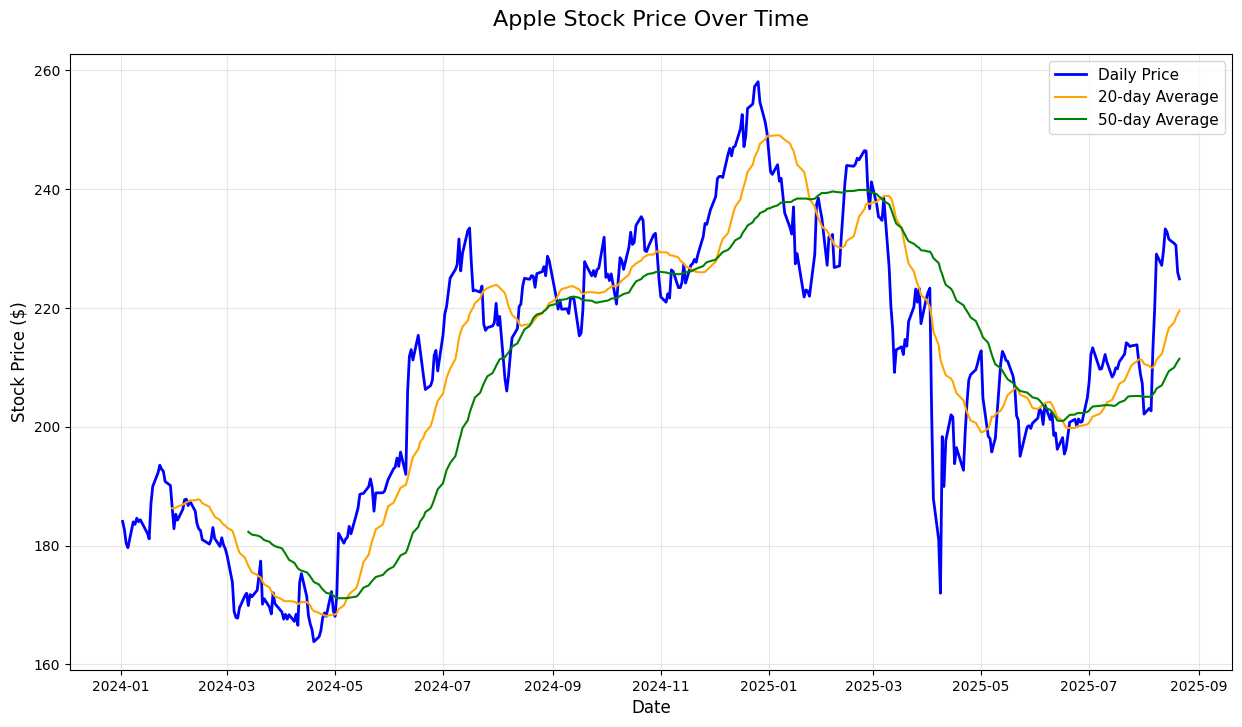


--- Key Statistics ---
Current Price: $224.90
Total Price Change: 22.2%
Highest Price: $259.18
Lowest Price: $162.91

Average Daily Trading Volume: 57.3 million shares


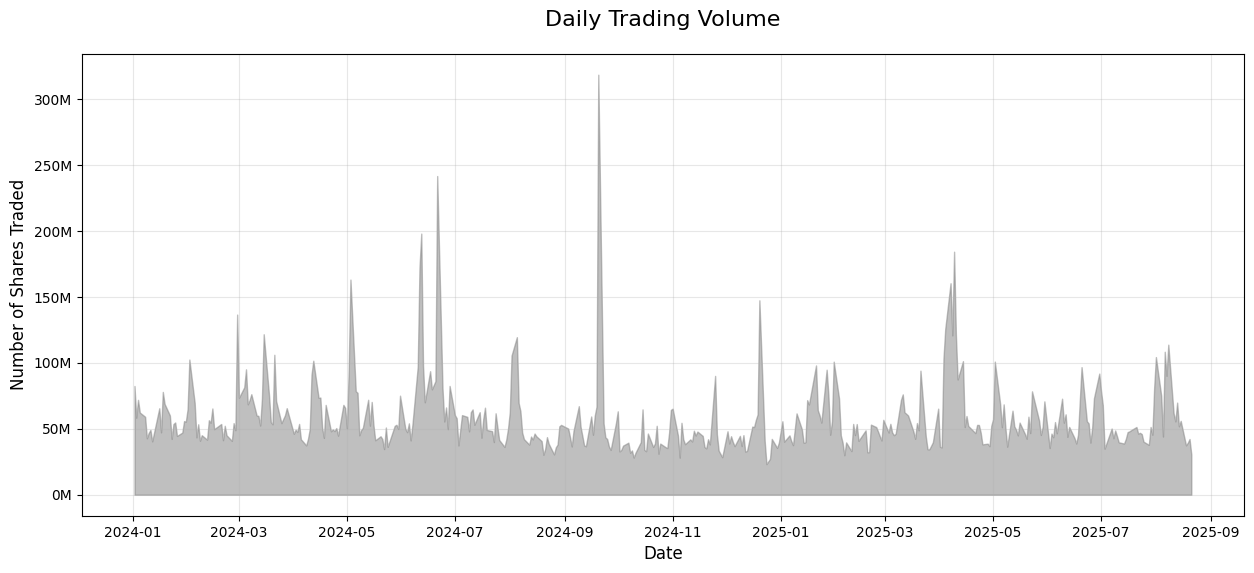

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # Hide any warning messages

# Download Apple stock data from Yahoo Finance
print("Downloading Apple (AAPL) stock data...")
data = yf.download('AAPL', start='2024-01-01', end='2025-08-22')

# Make column names simpler if needed
if isinstance(data.columns, pd.MultiIndex):
    data.columns = [col[0] for col in data.columns.values]

# Show basic information about our data
print("\n--- Basic Information ---")
print(f"Number of trading days: {len(data)}")
print("\nFirst 5 days of data:")
print(data.head())

# Calculate some helpful averages that traders often use
print("\n--- Calculating Price Averages ---")
# 20-day average shows short-term trend
data['20-day Average'] = data['Close'].rolling(window=20).mean()
# 50-day average shows medium-term trend
data['50-day Average'] = data['Close'].rolling(window=50).mean()

# Create a nice-looking chart
plt.figure(figsize=(15, 8))
plt.plot(data.index, data['Close'], label='Daily Price', linewidth=2, color='blue')
plt.plot(data.index, data['20-day Average'], label='20-day Average', linewidth=1.5, color='orange')
plt.plot(data.index, data['50-day Average'], label='50-day Average', linewidth=1.5, color='green')

plt.title('Apple Stock Price Over Time', fontsize=16, pad=20)
plt.ylabel('Stock Price ($)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

# Calculate some basic statistics
print("\n--- Key Statistics ---")
latest_price = data['Close'].iloc[-1]
price_change = ((latest_price - data['Close'].iloc[0]) / data['Close'].iloc[0]) * 100
highest_price = data['High'].max()
lowest_price = data['Low'].min()

print(f"Current Price: ${latest_price:.2f}")
print(f"Total Price Change: {price_change:.1f}%")
print(f"Highest Price: ${highest_price:.2f}")
print(f"Lowest Price: ${lowest_price:.2f}")

# Show average daily trading volume in a more readable format
avg_volume = data['Volume'].mean()
print(f"\nAverage Daily Trading Volume: {avg_volume/1_000_000:.1f} million shares")

# Simple trading volume chart
plt.figure(figsize=(15, 6))
plt.fill_between(data.index, data['Volume'], color='gray', alpha=0.5)
plt.title('Daily Trading Volume', fontsize=16, pad=20)
plt.ylabel('Number of Shares Traded', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(True, alpha=0.3)

# Make the volume numbers more readable (show in millions)
current_values = plt.gca().yaxis.get_major_formatter().format_data_short
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))
plt.show()

# Stock Price Prediction

We'll use machine learning to predict stock prices for the next year. Here's what we're going to do:

1. Prepare our data by creating features from historical prices
2. Train a machine learning model on this data
3. Make predictions for the next year
4. Visualize the predictions with confidence intervals

Note: Stock predictions are never 100% accurate - always use them as one of many tools for decision making!

Preparing data for prediction...

Training the AI model...

Model Accuracy Score: 65.84%


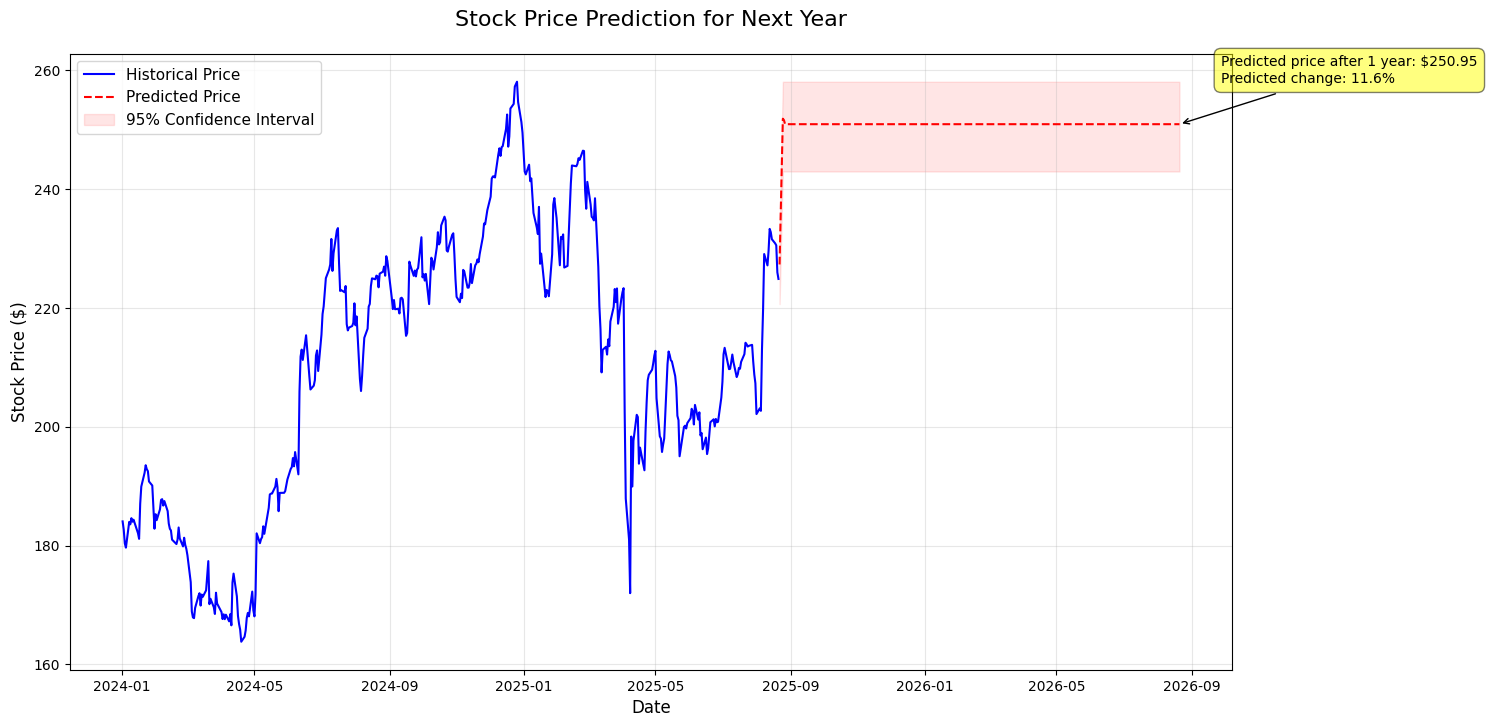


--- Prediction Summary ---
Current Price: $224.90
Predicted Price (1 year): $250.95
Predicted Change: 11.6%
Confidence Interval: $242.99 to $258.10

Note: These predictions are estimates based on historical data.
Always conduct thorough research and consider multiple factors before making investment decisions.


In [3]:
# Import additional libraries for prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
from datetime import timedelta

# Create features for prediction
def create_features(df):
    """Create features for our prediction model"""
    df = df.copy()
    
    # Technical indicators
    df['Price_Change'] = df['Close'].pct_change()
    df['Volume_Change'] = df['Volume'].pct_change()
    
    # Moving averages
    df['MA5'] = df['Close'].rolling(window=5).mean()
    df['MA20'] = df['Close'].rolling(window=20).mean()
    
    # Price volatility
    df['Volatility'] = df['Price_Change'].rolling(window=20).std()
    
    # Remove any missing values
    df = df.dropna()
    
    return df

# Prepare the data
print("Preparing data for prediction...")
features_df = create_features(data)

# Create target variable (next day's price)
features_df['Target'] = features_df['Close'].shift(-1)
features_df = features_df.dropna()

# Select features for training
feature_columns = ['Close', 'Volume', 'Price_Change', 'Volume_Change', 
                  'MA5', 'MA20', 'Volatility']
X = features_df[feature_columns]
y = features_df['Target']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
train_size = int(len(X_scaled) * 0.8)
X_train = X_scaled[:train_size]
y_train = y[:train_size]
X_test = X_scaled[train_size:]
y_test = y[train_size:]

# Train the model
print("\nTraining the AI model...")
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on test data
test_predictions = model.predict(X_test)

# Calculate model accuracy
test_score = model.score(X_test, y_test)
print(f"\nModel Accuracy Score: {test_score:.2%}")

# Prepare data for future predictions
last_data = features_df[feature_columns].iloc[-1:]
last_scaled = scaler.transform(last_data)

# Generate dates for the next year
future_dates = pd.date_range(start=data.index[-1] + timedelta(days=1),
                           end=data.index[-1] + timedelta(days=365),
                           freq='B')  # Business days only

# Make predictions for the next year
future_predictions = []
future_data = last_scaled.copy()

# Simulate day by day predictions
for _ in range(len(future_dates)):
    pred = model.predict(future_data)[0]
    future_predictions.append(pred)
    
    # Update the data for the next prediction
    new_row = future_data[0].copy()
    new_row[0] = pred  # Update Close price
    new_row[2] = (pred - future_data[0][0]) / future_data[0][0]  # Price change
    new_row[4] = np.mean(future_predictions[-5:] if len(future_predictions) >= 5 else future_predictions)  # MA5
    new_row[5] = np.mean(future_predictions[-20:] if len(future_predictions) >= 20 else future_predictions)  # MA20
    future_data = np.array([new_row])

# Create prediction intervals (simple estimate)
confidence = 0.95
n_trees = 100
predictions = []
for tree in range(n_trees):
    tree_pred = []
    future_data = last_scaled.copy()
    for _ in range(len(future_dates)):
        pred = model.estimators_[tree].predict(future_data)[0]
        tree_pred.append(pred)
        new_row = future_data[0].copy()
        new_row[0] = pred
        new_row[2] = (pred - future_data[0][0]) / future_data[0][0]
        new_row[4] = np.mean(tree_pred[-5:] if len(tree_pred) >= 5 else tree_pred)
        new_row[5] = np.mean(tree_pred[-20:] if len(tree_pred) >= 20 else tree_pred)
        future_data = np.array([new_row])
    predictions.append(tree_pred)

predictions = np.array(predictions)
lower = np.percentile(predictions, ((1 - confidence) / 2) * 100, axis=0)
upper = np.percentile(predictions, (confidence + ((1 - confidence) / 2)) * 100, axis=0)

# Plot the predictions
plt.figure(figsize=(15, 8))

# Plot historical data
plt.plot(data.index, data['Close'], label='Historical Price', color='blue')

# Plot predictions
plt.plot(future_dates, future_predictions, label='Predicted Price', color='red', linestyle='--')

# Plot confidence intervals
plt.fill_between(future_dates, lower, upper, color='red', alpha=0.1, label='95% Confidence Interval')

plt.title('Stock Price Prediction for Next Year', fontsize=16, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price ($)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add annotation about prediction
latest_price = data['Close'].iloc[-1]
predicted_price = future_predictions[-1]
price_change = ((predicted_price - latest_price) / latest_price) * 100

plt.annotate(f'Predicted price after 1 year: ${predicted_price:.2f}\nPredicted change: {price_change:.1f}%',
            xy=(future_dates[-1], predicted_price),
            xytext=(30, 30), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.show()

# Print prediction summary
print("\n--- Prediction Summary ---")
print(f"Current Price: ${latest_price:.2f}")
print(f"Predicted Price (1 year): ${predicted_price:.2f}")
print(f"Predicted Change: {price_change:.1f}%")
print(f"Confidence Interval: ${lower[-1]:.2f} to ${upper[-1]:.2f}")
print("\nNote: These predictions are estimates based on historical data.")
print("Always conduct thorough research and consider multiple factors before making investment decisions.")